In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# LOAD DATASET

In [ ]:
df = pd.read_csv('/content/StudentPerformanceFactors.csv')

# DATASET LOOKUP

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# DATA EXPLORATION

In [ ]:
print("------DATASET INFO------")
df.info()

print("------DATASET DESCRIBE------")
df.describe()

------DATASET INFO------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence         

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


CHECK FOR MISSING VALUES

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
missing_categorical_columns = df.columns[df.isna().any()]
print(missing_categorical_columns)

Index(['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home'], dtype='object')


In [ ]:
for col in missing_categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [ ]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


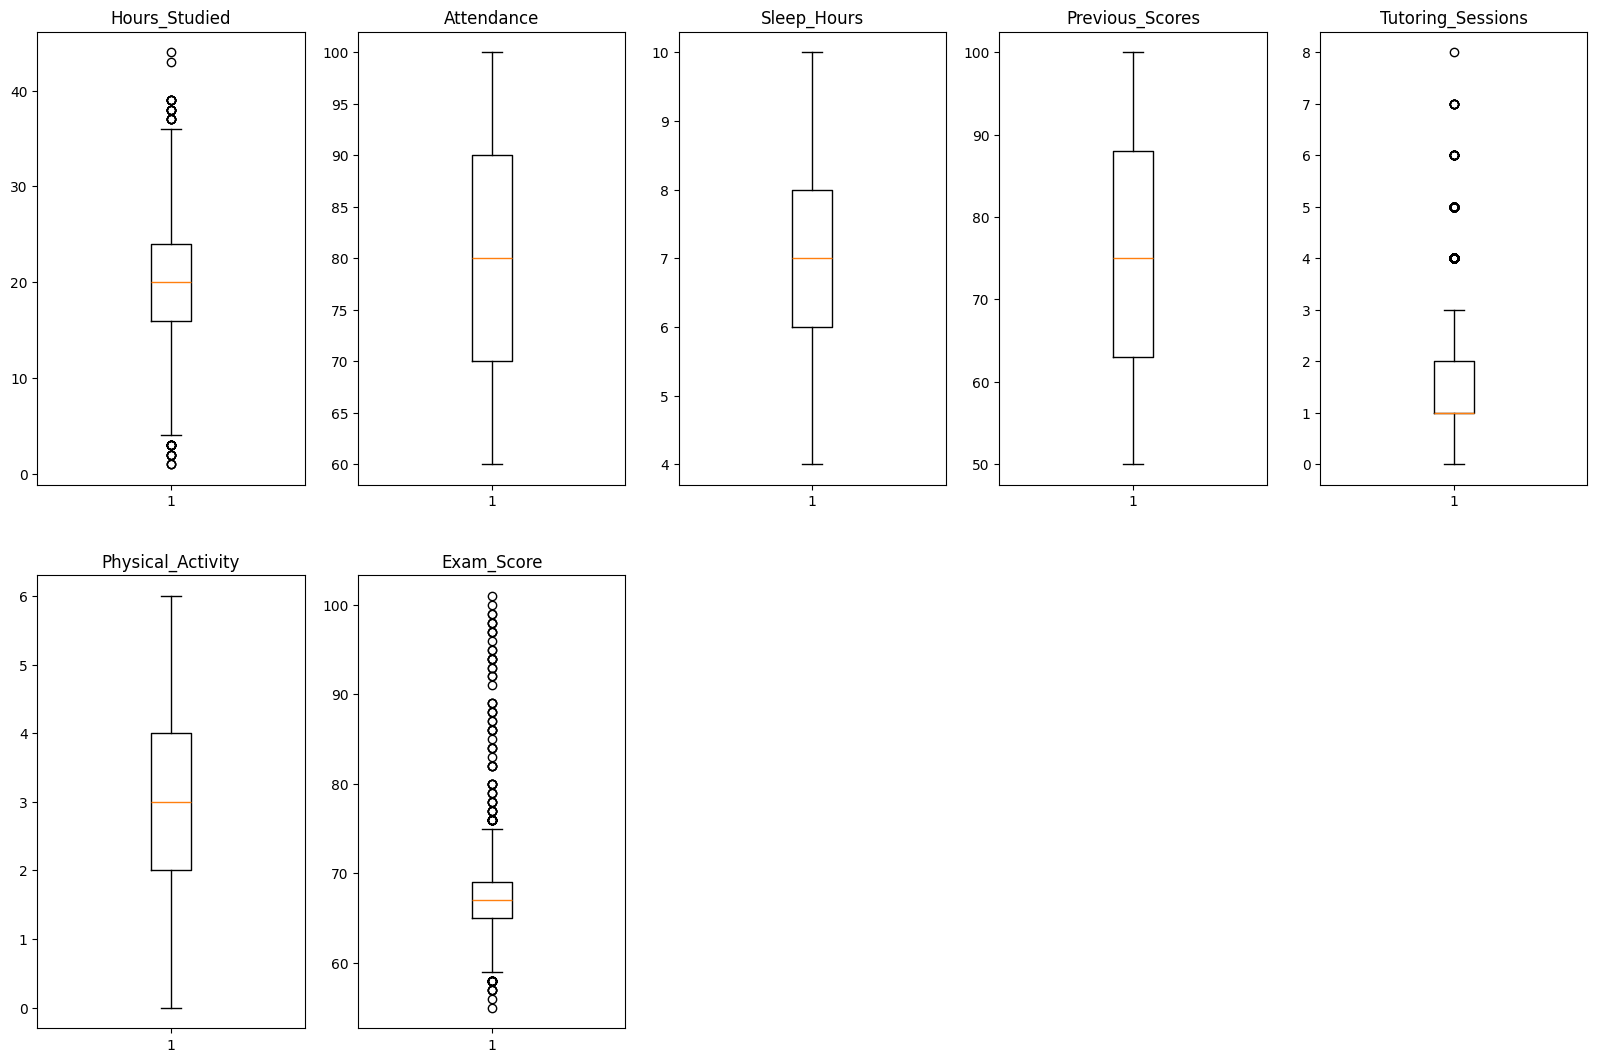

In [ ]:
numCol = df.select_dtypes(['int64','float64']).columns
plt.figure(figsize=(20,20))
for i, col in enumerate(numCol):
    plt.subplot(3, 5, i+1)
    plt.boxplot(df[col])
    plt.title(f"{col}")
plt.show()

# REMOVING OUTLIERS

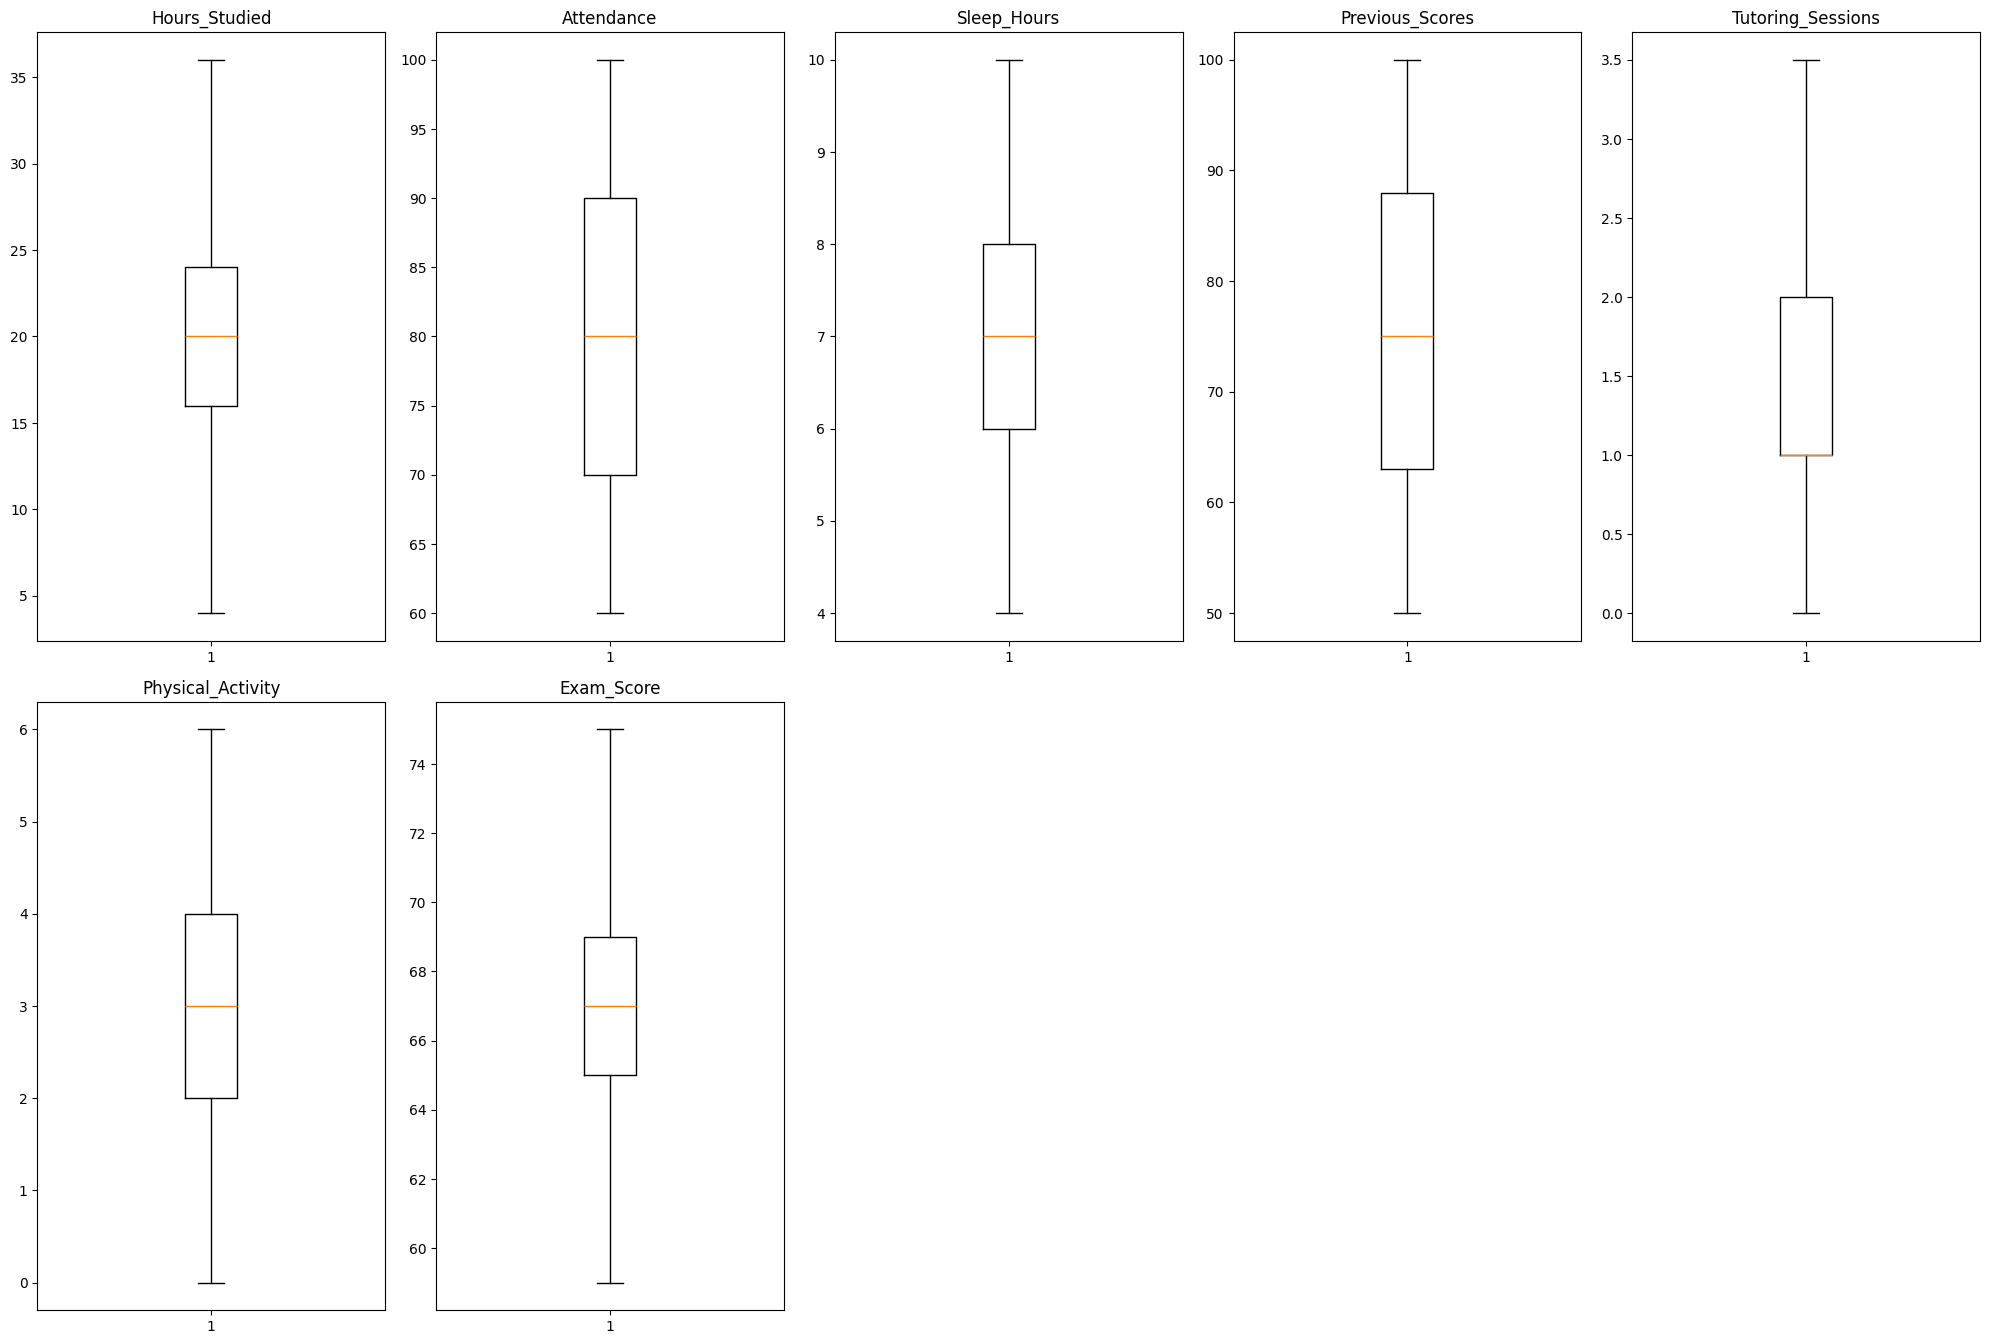

In [ ]:
import matplotlib.pyplot as plt

# Select numeric columns
numCol = df.select_dtypes(include=['int64', 'float64']).columns

for col in numCol:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    UP_FENCE = Q3 + 1.5 * IQR
    LO_FENCE = Q1 - 1.5 * IQR

    df[col] = df[col].clip(lower=LO_FENCE, upper=UP_FENCE)

# Plot boxplots
plt.figure(figsize=(20,20))
for i, col in enumerate(numCol):
    plt.subplot(3, 5, i+1)
    plt.boxplot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


# MAPPING ORDINAL COLUMNS

In [ ]:
ordinal_maps = {
    'Parental_Involvement': {'Low': 0, 'Medium': 1, 'High': 2},
    'Access_to_Resources': {'Low': 0, 'Medium': 1, 'High': 2},
    'Motivation_Level': {'Low': 0, 'Medium': 1, 'High': 2},
    'Family_Income': {'Low': 0, 'Medium': 1, 'High': 2},
    'Teacher_Quality': {'Low': 0, 'Medium': 1, 'High': 2},
    'Parental_Education_Level': {'High School': 0, 'College': 1, 'Postgraduate': 2},
    'Distance_from_Home': {'Near': 0, 'Moderate': 1, 'Far': 2},
    'Peer_Influence': {'Negative': 0, 'Neutral': 1, 'Positive': 2}
}

for col, mapping in ordinal_maps.items():
    df[col] = df[col].map(mapping)

# OHE ON NOMINAL COLUMNS

In [ ]:
nominal_cols = [
    'Extracurricular_Activities',
    'Internet_Access',
    'Learning_Disabilities',
    'School_Type',
    'Gender'
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

# DATA VISUALIZATION

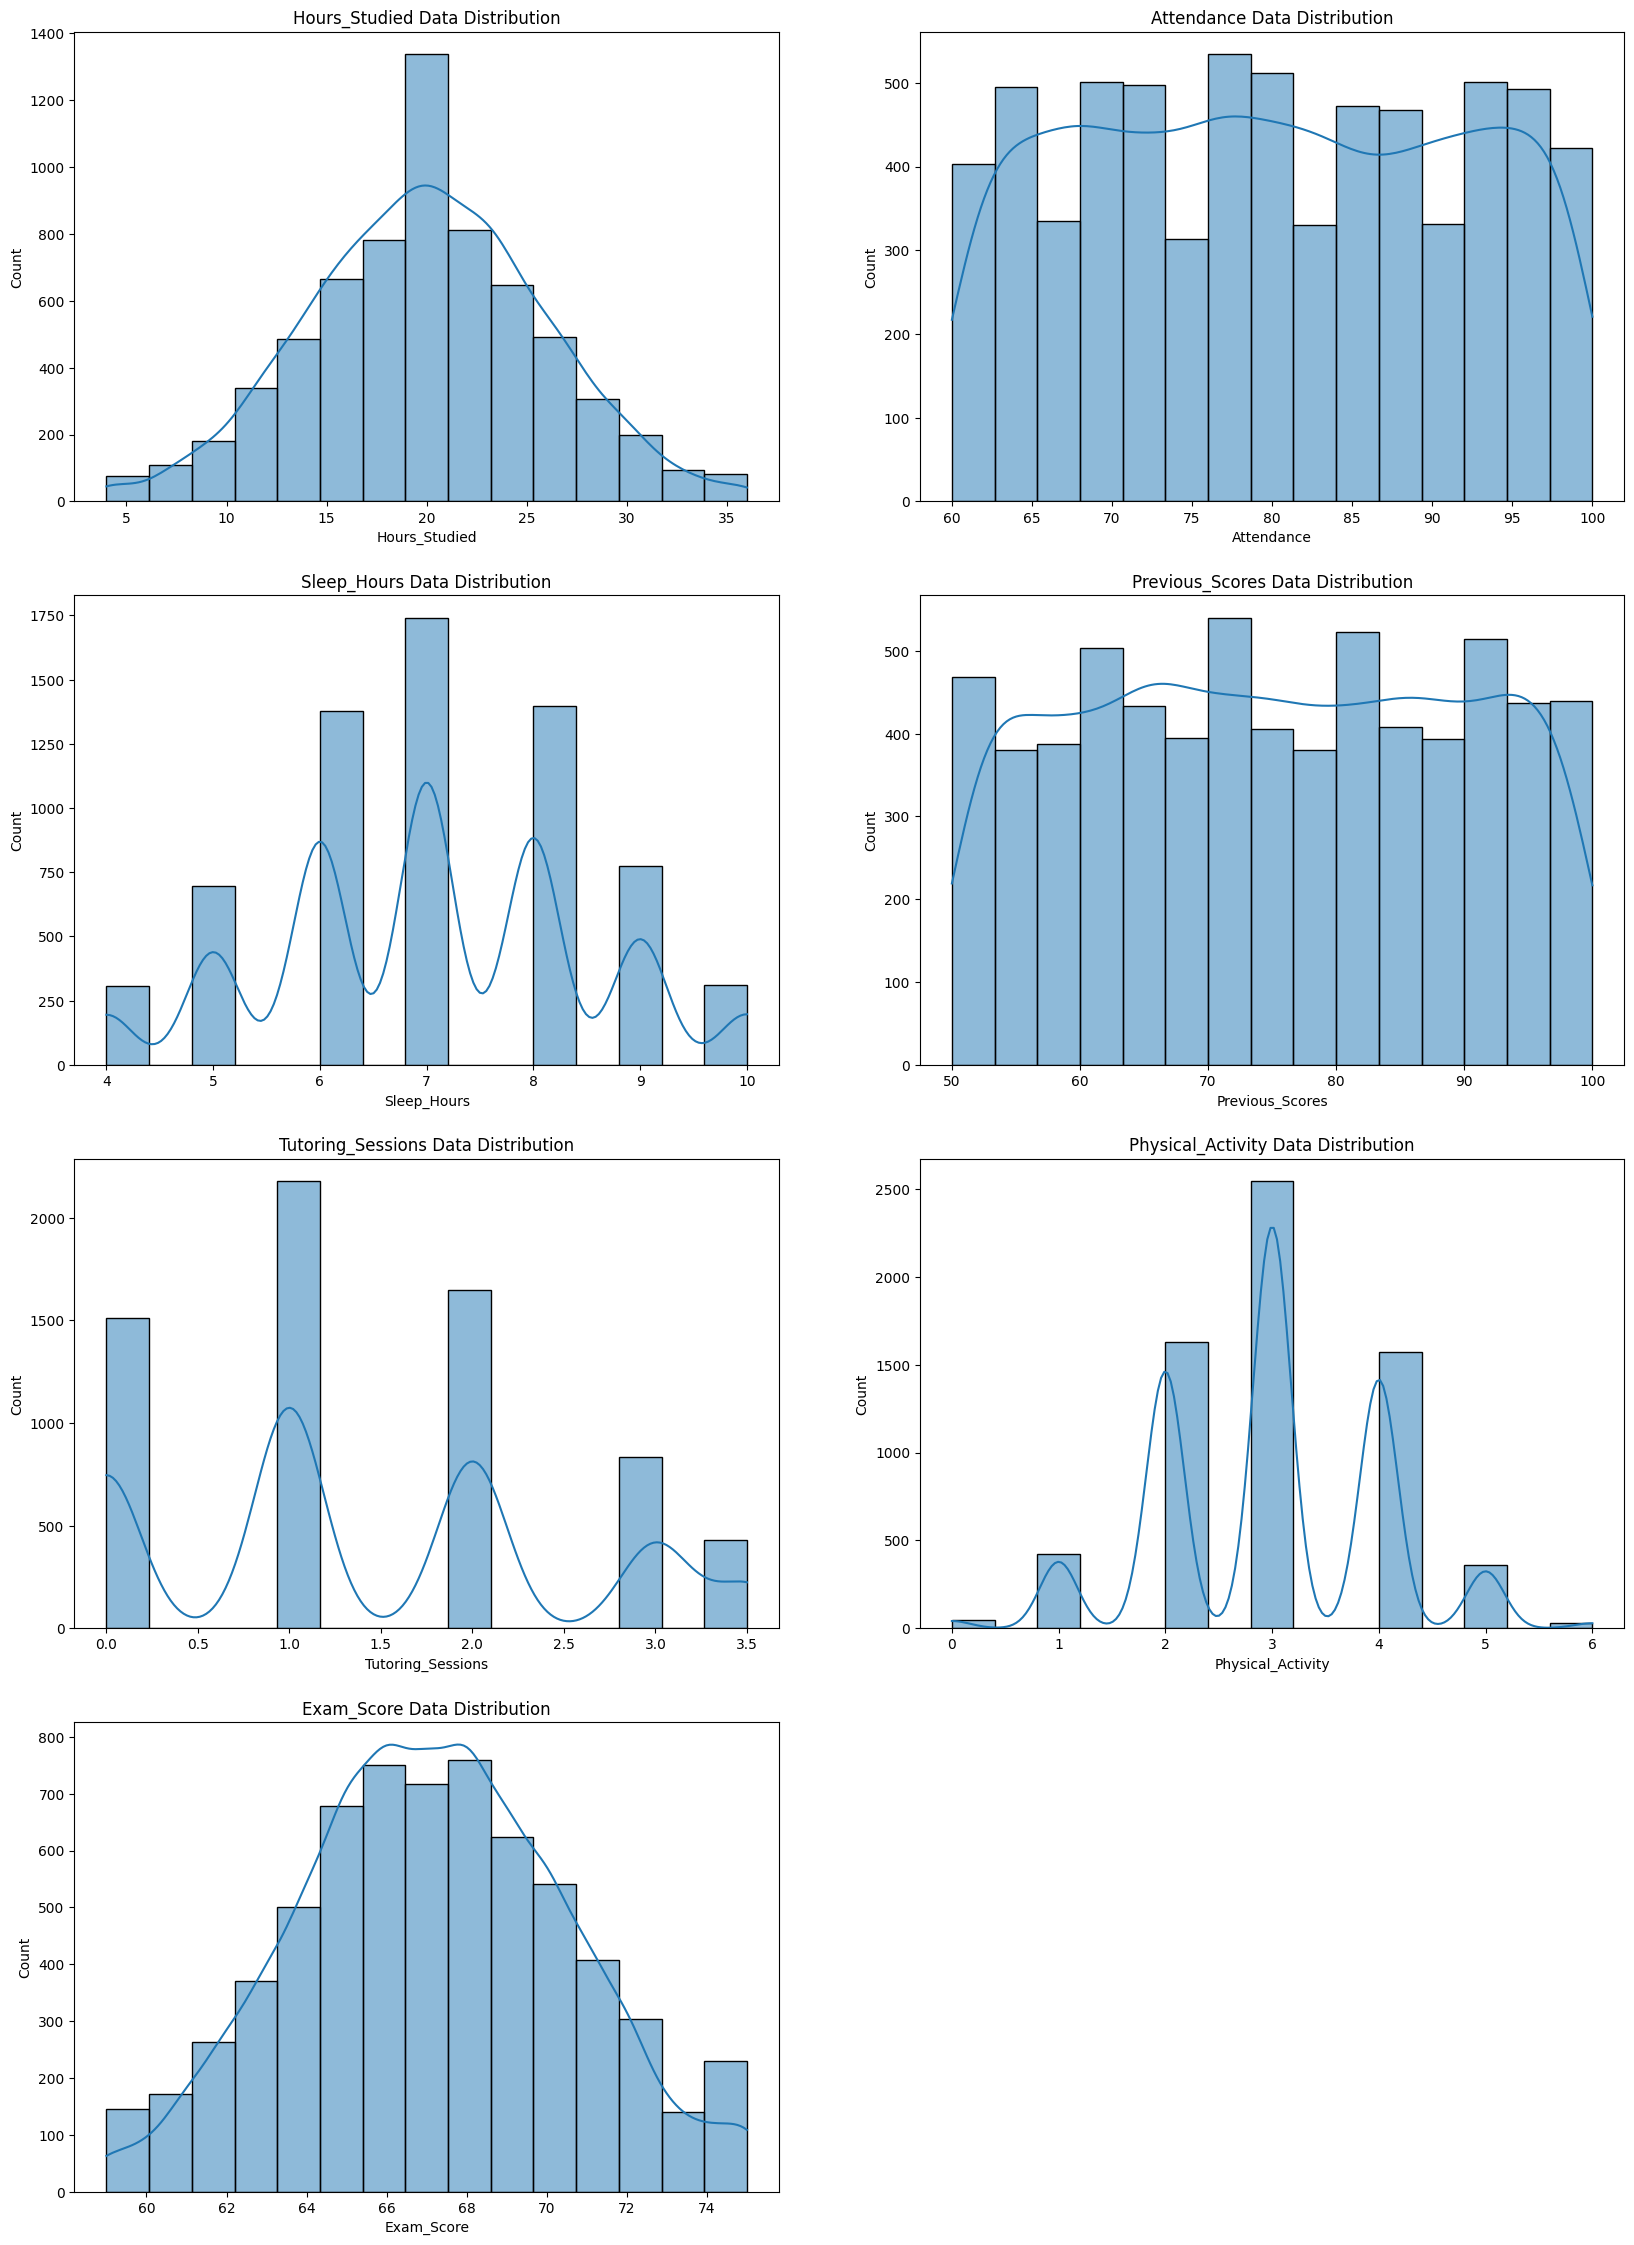

In [ ]:
plt.figure(figsize=(20,50))
for i , col in enumerate(numCol):
    plt.subplot(7,2,i+1)
    sns.histplot(df[col] , kde=True , bins=15 , edgecolor='k')
    plt.title(f'{col} Data Distribution')
plt.show()

# TRAINING MODEL LINEAR REGRESSION

In [ ]:
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linear.predict(X_test)

# MODEL EVALUATION

In [ ]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9433422459356099
MAE: 0.3550267390605231
MSE: 0.6387093215900111
RMSE: 0.7991929188812994


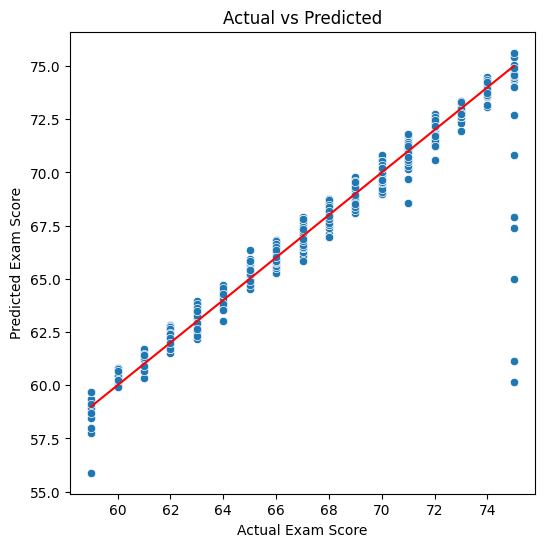

In [ ]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted")
plt.show()

# POLYNOMIAL REGRESSION

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
X = df.drop(columns=['Exam_Score'])
y = df['Exam_Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

y_pred = model.predict(X_test_poly)

# MODEL EVALUATION (POLYNOMIAL)

In [ ]:
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.9103106450743593
MAE: 0.5739458401170076
MSE: 1.011078324306647
RMSE: 1.0055239053879559


# RESULTS
Linear Regression has a higher accuracy than Polynomial regression on this dataset.
